---

<center> <h1> Setup & Cleaning of Data </h1> </center>

---

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Basic Libraries
import numpy as np

import pandas as pd
import seaborn as sb
import seaborn as sn # data visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt # we only need pyplot
import matplotlib.pyplot as ml #data visualization
sb.set() # set the default Seaborn style for grap

# Import plotly graph go & offline py
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import math

In [3]:
#Import athlete data csv file into notebook
athletedata = pd.read_csv('Data/athlete_events.csv')
athletedata.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
athletedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
athletedata.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In order to find out if we will need to drop any values:
1. Find out # of attendees per year from 1896 to 2016,
2. Then find the no. of non-na height/weight/year
3. To get the total % of non-na we divide each variable by the total # of attendees

In [6]:
#Find out # of attendees per year from 1896 to 2016
tempDF = athletedata.groupby('Year')[['Height', 'Weight', 'Age']].count()
attendees = athletedata['Year'].value_counts().sort_index()
tempDF['Total Attendees'] = attendees.values
print('The Total Attendees from 1896 to 2016 in the List/Array: \n\n',attendees.values)

#Get the total % of non-na via dividing each variable by total # of attendees
tempDF['Height non-NA'] = tempDF['Height'] / tempDF['Total Attendees']
tempDF['Weight non-NA'] = tempDF['Weight'] / tempDF['Total Attendees']
tempDF['Age non-NA'] = tempDF['Age'] / tempDF['Total Attendees']

tempDF.head(3)

The Total Attendees from 1896 to 2016 in the List/Array: 

 [  380  1936  1301  1733  3101  4040  4292  5693  5574  3321  7401  7480
  9358  6434  9235  9480 10479 11959 10502  8937 11588 14676 16413  3160
 13780  3605 13821  4109 13443  4382 13602  4402 12920  4891 13688]


,Height,Weight,Age,Total Attendees,Height non-NA,Weight non-NA,Age non-NA
Year,,,,,,,
1896,46,49,217,380,0.121053,0.128947,0.571053
1900,116,79,1146,1936,0.059917,0.040806,0.591942
1904,213,147,1027,1301,0.163720,0.112990,0.789393


<Axes: title={'center': 'Proportion/Percentage of Non-missing Values for Weight, Height & Age'}, xlabel='Year'>

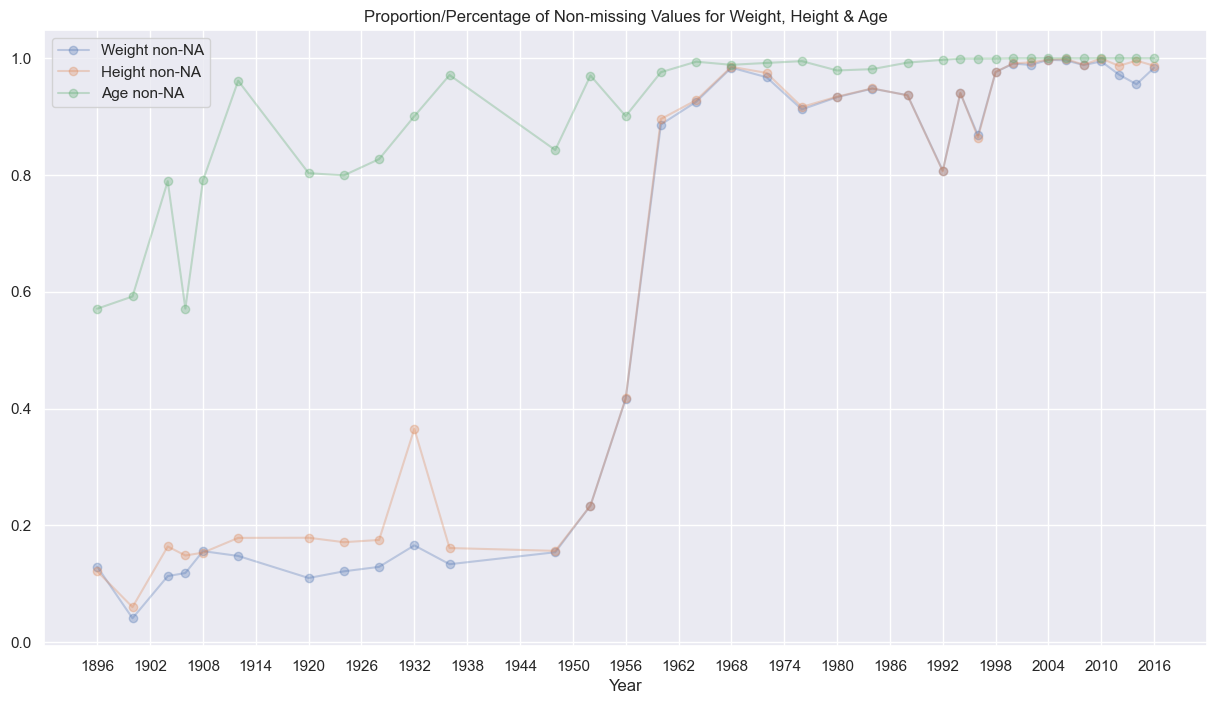

In [7]:
#Plotting the non-na variables to show the proportion of non-missing values for height/value and age
tempDF[['Weight non-NA', 'Height non-NA', 'Age non-NA']].plot(figsize=(15,8), marker='o', alpha = .3, 
                                                 xticks = range(1896, 2018, 6), 
                                                 title='Proportion/Percentage of Non-missing Values for Weight, Height & Age')

**Based on the plot:**
1. We observe that up till 1960, data for height/weight that was missing was mostly from <1960. 
2. We can treat these as bad data points.
3. Our analysis will focus on 1960 to 2016. 

**Note:**<br>
To analyze the relationship between height and weight and gold medal wins for athletes, we will only consider athletes whose height and weight data are complete. Athletes with missing data for either height or weight will be excluded from this analysis.

In [8]:
#Dropping data >= 1960
athletedata = athletedata.loc[athletedata['Year']>=1960, :]
athletedata.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [9]:
#Check for duplicated data within df
athletedata.duplicated(subset=None, keep='first')
athleteDataDuplicate = athletedata[athletedata.duplicated(keep='last')]
 
print("Duplicate Rows except last occurrence based on all columns are :")
athleteDataDuplicate.head()

#Drop duplicates of athletes (we will only drop if the name, sex, year and event is the same!)
#athletedata = athletedata.drop_duplicates(["Name","Games", "Sex","Year","Event"])

Duplicate Rows except last occurrence based on all columns are :


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [10]:
athleteDataDuplicate.shape

(0, 15)

ID             0
Name           0
Sex            0
Age         1115
Height     11119
Weight     11824
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     180672
dtype: int64


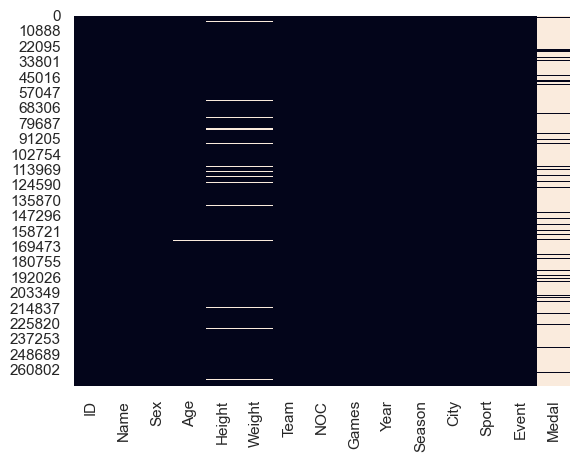

In [11]:
#visualizations on missing data in height,weight,age,medals
import seaborn as sns
sns.heatmap(athletedata.isnull(), cbar=False)

print(athletedata.isnull().sum())

In [12]:
#Fill up NaN for Medal with No Medals
athletedata['Medal'].fillna('No Medal', inplace = True)

#Lets check on our missing values for medals again 
print('Missing values for Medals:',athletedata.Medal.isnull().sum())

Missing values for Medals: 0


In [13]:
#Filter athlete df to only include NOC & Team (without duplicates), count and display top 5
print(athletedata.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head())

AUS    15
USA    15
GER    15
CAN    15
SWE    14
Name: NOC, dtype: int64


Based on the results above, we **STILL** cannot verify the accuracy of the NOC (National Olympic Committee) tags for each athlete. Additionally, when **manually** examining the data, **Singapore is not correctly associated with its own region.**

**To resolve this:**
1. Import the noc_regions.csv dataset
2. Perform a merge to check for the right NOC & it's respective country names.

In [14]:
# Lets read in the noc_country mapping first
noc_country = pd.read_csv('data/noc_regions.csv')

#Drop notes as it is not needed 
noc_country.drop('notes', axis = 1 , inplace = True) 

#Replace region with country
noc_country.rename(columns = {'region':'Country'}, inplace = True)

#Preview noc_country df
noc_country.head(5)

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [15]:
# merging the original dataset with the NOC df using the NOC code (e.g. AFG/AHO/ALB/... ) as the primary key.
athleteDatas = athletedata.merge(noc_country,
                                left_on = 'NOC',
                                right_on = 'NOC',
                                how = 'left')

#Observe that the column that is merge in "Country" has the correct country 
#displayed in response to the "NOC" of that particular row!
athleteDatas.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China
2,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands


In [16]:
# Do we have any NOCs that didn't have a matching country in the master?
athleteDatas.loc[athleteDatas['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
456,SGP,Singapore
5216,ROT,Refugee Olympic Athletes
34381,SGP,June Climene
49374,TUV,Tuvalu
83043,SGP,Singapore-2
181847,SGP,Singapore-1


In [17]:
# Manually replace non-matching Teams as shown above
athleteDatas['Country'] = np.where(athleteDatas['NOC']=='SGP', 'Singapore', athleteDatas['Country'])
athleteDatas['Country'] = np.where(athleteDatas['NOC']=='ROT', 'Refugee Olympic Athletes', athleteDatas['Country'])
athleteDatas['Country'] = np.where(athleteDatas['NOC']=='TUV', 'Tuvalu', athleteDatas['Country'])

#Change from Country coluimns into Team
athleteDatas.drop('Team', axis = 1, inplace = True)
athleteDatas.rename(columns = {'Country': 'Team'}, inplace = True)

#Check dataframe
athleteDatas.head(5)

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China
2,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands
3,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,Netherlands
4,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands


In [18]:
#Dealing with missing values of height, weight & age w/ their respective region's mean
def NaN_percent(athleteDatas, column_name):
    row_count = athleteDatas[column_name].shape[0]
    empty_values = row_count - athleteDatas[column_name].count()
    return (100.0*empty_values)/row_count
for i in list(athleteDatas):
    print(i +': ' + str(NaN_percent(athleteDatas,i))+'%') 

ID: 0.0%
Name: 0.0%
Sex: 0.0%
Age: 0.533309099257672%
Height: 5.318263564704982%
Weight: 5.6554679727557975%
NOC: 0.0%
Games: 0.0%
Year: 0.0%
Season: 0.0%
City: 0.0%
Sport: 0.0%
Event: 0.0%
Medal: 0.0%
Team: 0.0%


**Percentage shows how complete the data is there:**
* 3.49% missing in Age
* 22.19% for Height
* 23.19% for Weight

***

In [19]:
#Find average height, weight & age for athletes

#Get average height 
average_height= athleteDatas.Height.mean()
print("\naverage height:",average_height)

#Get average weight 
average_weight=athleteDatas.Weight.mean()
print("average weight:",average_weight)

#Fill nan values of height and weight with average
athleteDatas["Height"].fillna(athleteDatas["Height"].mean(), inplace=True)
athleteDatas["Weight"].fillna(athleteDatas["Weight"].mean(), inplace=True)

#Fill in NaN values in Age with each sex’s mean value of Age
athleteDatas["Age"].fillna(athleteDatas.groupby("Sex")["Age"].transform("mean"), inplace=True)


average height: 175.35514490813475
average weight: 70.66795861048021


In [20]:
#Lets check on our missing values for Height 
print('Missing values for Height:',athleteDatas.Height.isnull().sum())
#Lets check on our missing values for Weight 
print('Missing values for Weight:',athleteDatas.Weight.isnull().sum())
#Lets check on our missing values for Age 
print('Missing values for Age:',athleteDatas.Age.isnull().sum())

Missing values for Height: 0
Missing values for Weight: 0
Missing values for Age: 0


---

<center> <h2> Done with cleaning dataset for height/weight/age/medal </h2> </center>

---

In [21]:
#Export cleaned dataset for data persistence
athleteDatas.to_csv('Cleaned Data/athleteDatas.csv', index=False)

---

## Reference materials & Sources: 

1. https://chrisalbon.com/python/data_wrangling/
2. Data for Athletes for most appearance (Top 50) from: https://en.wikipedia.org/wiki/List_of_athletes_with_the_most_appearances_at_Olympic_Games
3. https://www.theanalysisfactor.com/regression-modelshow-do-you-know-you-need-a-polynomial/


---